In [24]:
import duckdb

con = duckdb.connect()

# One-time setup per session
con.execute("INSTALL httpfs;")
con.execute("LOAD httpfs;")

# Anonymous public S3 access
con.execute("""
SET s3_region='us-east-1';
SET s3_use_ssl=true;
SET s3_url_style='path';
""")

con.execute("SELECT 'DuckDB ready'").fetchall()


[('DuckDB ready',)]

In [26]:
con.execute("""
CREATE OR REPLACE VIEW animal_activity AS
SELECT *
FROM read_parquet(
  's3://jax-envision-public-data/study_1001/2025v3.3/tabular/*/*/animal_activity_db.parquet',
  hive_partitioning = true
)
""")


In [28]:
con.execute("""
SELECT
  COUNT(*) AS n_rows,
  COUNT(DISTINCT cage_id) AS n_cages,
  COUNT(DISTINCT animal_id) AS n_animals
FROM animal_activity
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,n_rows,n_cages,n_animals
0,213460995,18,54


In [30]:
df_preview = con.execute("""
SELECT *
FROM animal_activity
WHERE cage_id = 4917
  AND name = 'animal_bouts.active'
LIMIT 10
""").df()

df_preview


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,predicted_identity,time,resolution,name,value,units,version_str,organization_id,cage_id,study_id,device_id,run_id,animal_id,ULID,__index_level_0__,filename,source_file,date
0,blackallwhite,2025-01-07 23:00:00,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZDBR0RFF62JVQ56S8FMQ3,0,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07
1,blackallwhite,2025-01-07 23:00:01,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZDNGGXJ788ER4891Q7W21,1,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07
2,blackallwhite,2025-01-07 23:00:02,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZDZ90F1WZ4ZMJ3DXDGD8F,2,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07
3,blackallwhite,2025-01-07 23:00:03,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZE91G1AZ7M6E0K54QF913,3,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07
4,blackallwhite,2025-01-07 23:00:04,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZEJT06RN7V99CPZ0EPMG6,4,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07
5,blackallwhite,2025-01-07 23:00:05,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZEWJGMVC5T518FAC954ZE,5,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07
6,blackallwhite,2025-01-07 23:00:06,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZF6B0PR9XERH1KBSS9REJ,6,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07
7,blackallwhite,2025-01-07 23:00:07,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZFG3GV2KDCG7PQJAF29ZB,7,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07
8,blackallwhite,2025-01-07 23:00:08,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZFSW0MDCM64Y4W7H69NNF,8,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07
9,blackallwhite,2025-01-07 23:00:09,1,animal_bouts.active,1.0,time_in_seconds,v3.3,8,4917,1001,deepgraph-manager-inject,2025v3.3,9241,0FSAEZG3MGG60AS755YAGX2AFF,9,s3://org-8-uploads-stage/pipeline/study_1001/2...,s3://org-8-uploads-stage/pipeline/study_1001/2...,2025-01-07


In [57]:
con.execute("""
SELECT
  COUNT(*) AS n_rows,
  COUNT(DISTINCT cage_id) AS n_cages,
  COUNT(DISTINCT animal_id) AS n_animals
FROM animal_activity
""").df()


,n_rows,n_cages,n_animals
0,213460995,18,54


In [59]:
con.execute("""
SELECT
  cage_id,
  COUNT(DISTINCT animal_id) AS n_animals,
  MIN(time) AS start_time,
  MAX(time) AS end_time
FROM animal_activity
WHERE name = 'animal_bouts.active'
GROUP BY cage_id
ORDER BY n_animals DESC
""").df()


FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

,cage_id,n_animals,start_time,end_time
0,4921,3,2025-01-07 22:00:00,2025-01-22 11:59:59
1,4925,3,2025-01-07 23:00:00,2025-01-22 11:59:59
2,4919,3,2025-01-07 22:00:00,2025-01-22 12:59:59
3,4927,3,2025-01-22 14:00:00,2025-02-04 23:59:59
4,4931,3,2025-01-22 14:00:00,2025-02-04 23:59:59
5,4923,3,2025-01-07 22:00:00,2025-01-22 12:59:59
6,4924,3,2025-01-07 22:00:00,2025-01-22 12:59:59
7,4918,3,2025-01-07 22:00:00,2025-01-22 11:59:59
8,4932,3,2025-01-22 14:00:00,2025-02-04 23:59:59
9,4917,3,2025-01-07 22:00:00,2025-01-22 11:59:59


In [61]:
CAGE_ID = 4917
time_bounds = con.execute(f"""
SELECT
  MIN(time) AS start_time,
  MAX(time) AS end_time
FROM animal_activity
WHERE cage_id = {CAGE_ID}
  AND name = 'animal_bouts.active'
""").df()

time_bounds


,start_time,end_time
0,2025-01-07 22:00:00,2025-01-22 11:59:59


In [65]:
start_time = time_bounds.loc[0, "start_time"]

df_raw = con.execute(f"""
SELECT
  time AS timestamp,
  animal_id,
  value AS active_seconds
FROM animal_activity
WHERE cage_id = {CAGE_ID}
  AND name = 'animal_bouts.active'
  AND time BETWEEN TIMESTAMP '{start_time}'
                  AND TIMESTAMP '{start_time}' + INTERVAL 2 DAY
ORDER BY time
""").df()

df_raw.shape


(551955, 3)

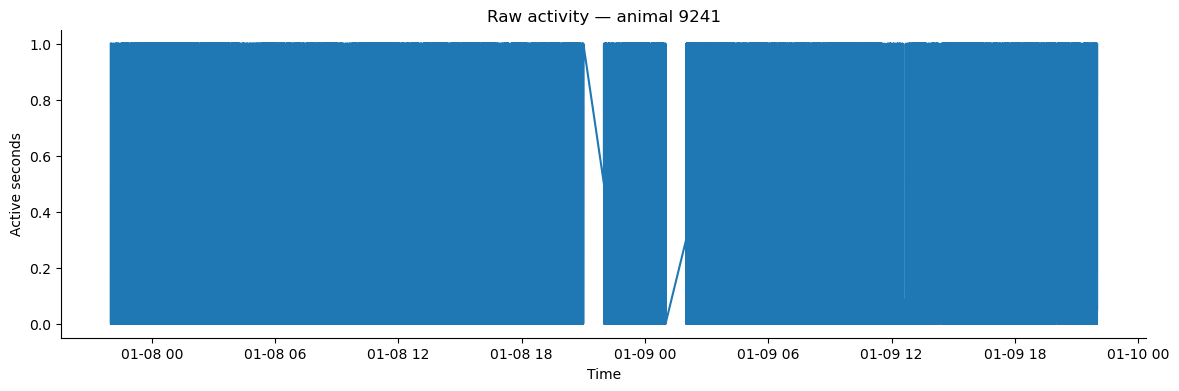

In [67]:
animal_id = df_raw["animal_id"].iloc[0]
g = df_raw[df_raw["animal_id"] == animal_id]

plt.figure(figsize=(14,4))
plt.plot(g["timestamp"], g["active_seconds"])
plt.title(f"Raw activity — animal {animal_id}")
plt.xlabel("Time")
plt.ylabel("Active seconds")
plt.show()


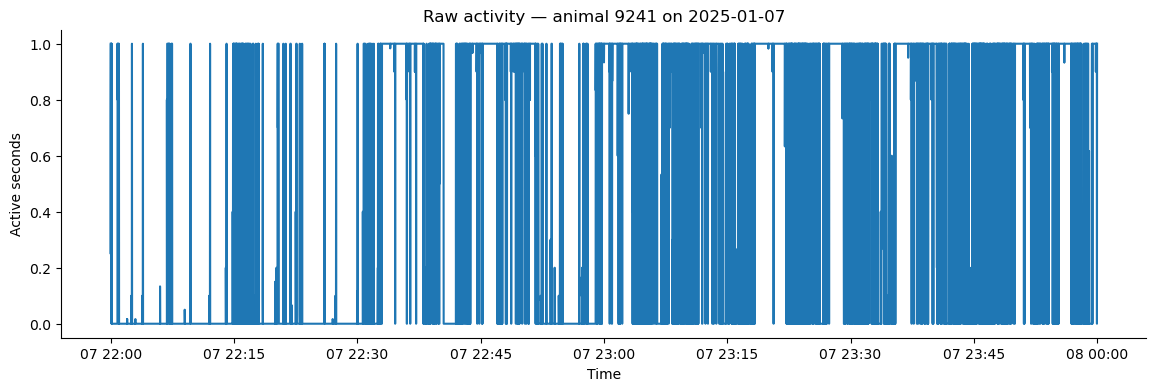

In [79]:
animal_id = df_raw["animal_id"].iloc[0]

day_to_plot = pd.Timestamp("2025-01-07")  

g = df_raw[
    (df_raw["animal_id"] == animal_id) &
    (df_raw["timestamp"].dt.floor('D') == day_to_plot)
]
plt.figure(figsize=(14,4))
plt.plot(g["timestamp"], g["active_seconds"])
plt.title(f"Raw activity — animal {animal_id} on {day_to_plot.date()}")
plt.xlabel("Time")
plt.ylabel("Active seconds")
plt.show()


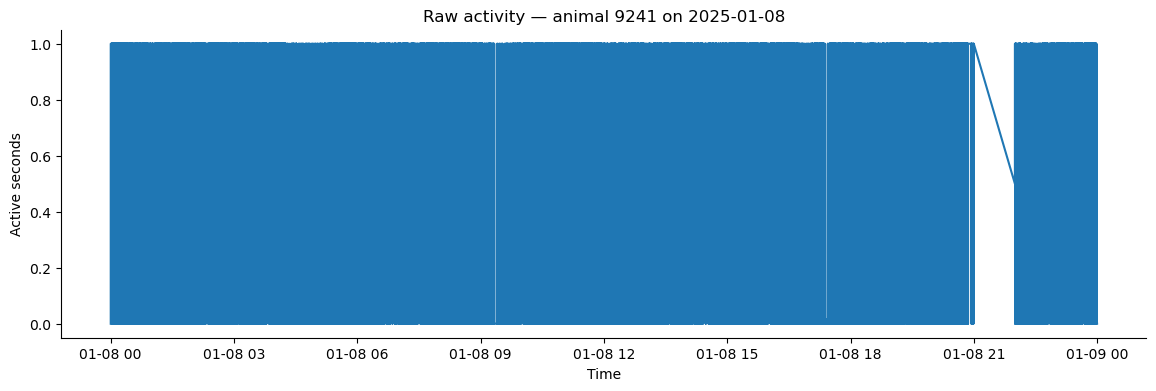

In [91]:
animal_id = df_raw["animal_id"].iloc[0]

day_to_plot = pd.Timestamp("2025-01-08")  

g = df_raw[
    (df_raw["animal_id"] == animal_id) &
    (df_raw["timestamp"].dt.floor('D') == day_to_plot)
]
plt.figure(figsize=(14,4))
plt.plot(g["timestamp"], g["active_seconds"])
plt.title(f"Raw activity — animal {animal_id} on {day_to_plot.date()}")
plt.xlabel("Time")
plt.ylabel("Active seconds")
plt.show()


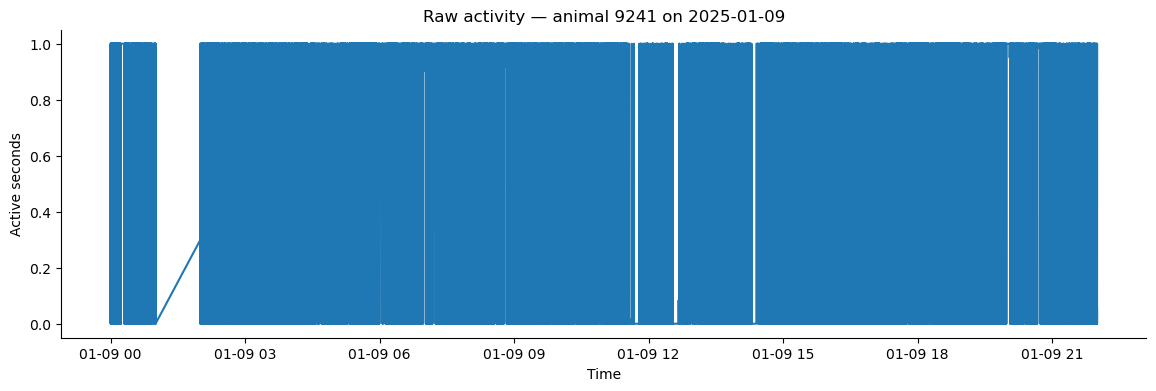

In [93]:
animal_id = df_raw["animal_id"].iloc[0]

day_to_plot = pd.Timestamp("2025-01-09")  

g = df_raw[
    (df_raw["animal_id"] == animal_id) &
    (df_raw["timestamp"].dt.floor('D') == day_to_plot)
]
plt.figure(figsize=(14,4))
plt.plot(g["timestamp"], g["active_seconds"])
plt.title(f"Raw activity — animal {animal_id} on {day_to_plot.date()}")
plt.xlabel("Time")
plt.ylabel("Active seconds")
plt.show()


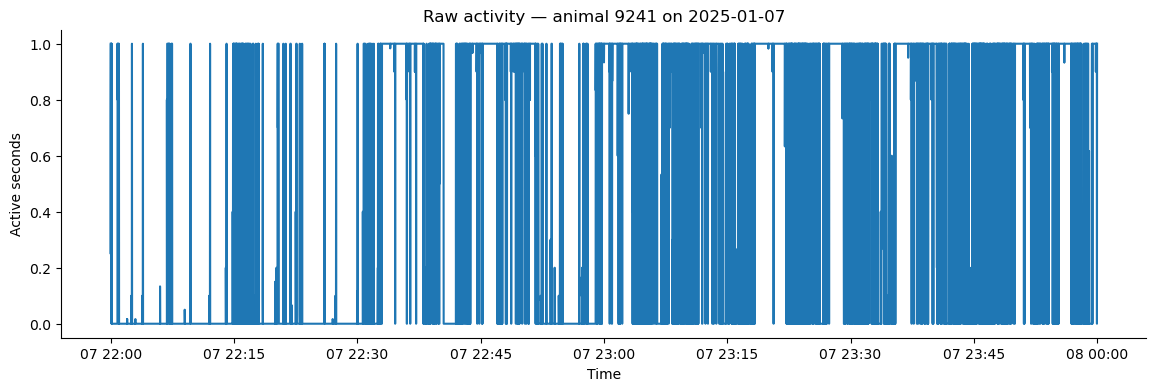

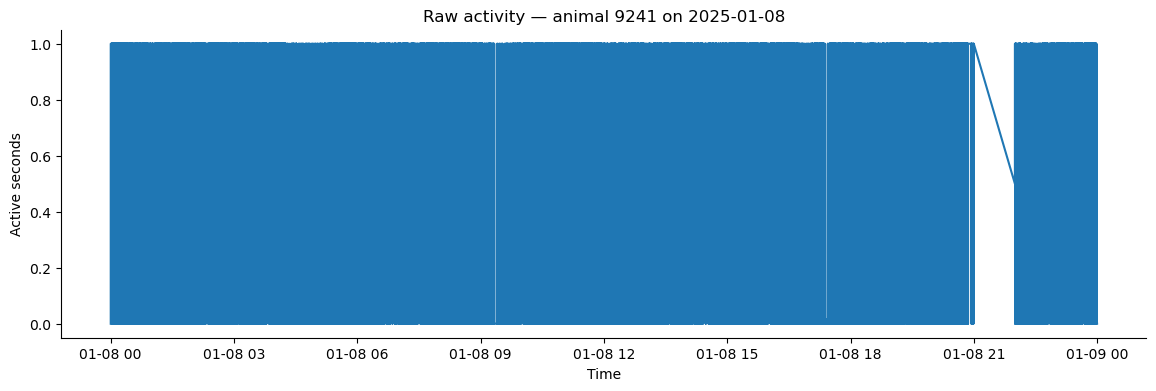

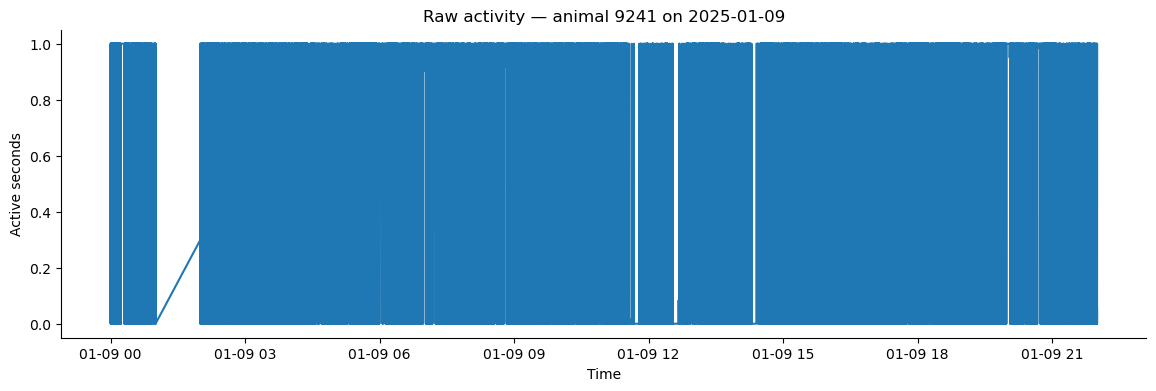

In [101]:
days = df_raw["timestamp"].dt.floor('D').sort_values().unique()

for day in days:
    g = df_raw[
        (df_raw["animal_id"] == animal_id) &
        (df_raw["timestamp"].dt.floor('D') == day)
    ]
    plt.figure(figsize=(14,4))
    plt.plot(g["timestamp"], g["active_seconds"])
    plt.title(f"Raw activity — animal {animal_id} on {day.date()}")
    plt.xlabel("Time")
    plt.ylabel("Active seconds")
    plt.show()


In [133]:
df_raw.head()

,timestamp,animal_id,active_seconds,hour,minute,is_active,minute_of_day,period
0,2025-01-07 22:00:00,9241,1.0,22,2025-01-07 22:00:00,True,1320,Dark
1,2025-01-07 22:00:00,9239,0.0,22,2025-01-07 22:00:00,False,1320,Dark
2,2025-01-07 22:00:00,9240,1.0,22,2025-01-07 22:00:00,True,1320,Dark
3,2025-01-07 22:00:00,9240,0.1,22,2025-01-07 22:00:00,False,1320,Dark
4,2025-01-07 22:00:00,9239,0.1,22,2025-01-07 22:00:00,False,1320,Dark


/var/folders/bp/jv7_b5rd60j6_rlflqn6zd580000gn/T/ipykernel_51788/3339682881.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_raw["minute"] = df_raw["timestamp"].dt.floor("T")


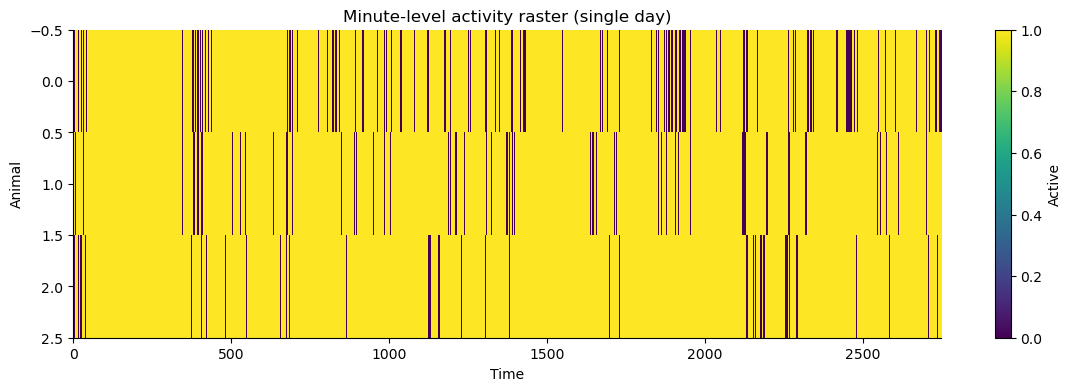

In [131]:
df_raw["minute"] = df_raw["timestamp"].dt.floor("T")
df_raw["is_active"] = df_raw["active_seconds"] > 0.5

pivot = df_raw.pivot_table(
    index="animal_id",
    columns="minute",
    values="is_active",
    aggfunc="max"
)


plt.figure(figsize=(14,4))
plt.imshow(pivot, aspect="auto", interpolation="none")
plt.colorbar(label="Active")
plt.xlabel("Time")
plt.ylabel("Animal")
plt.title("Minute-level activity raster (single day)")
plt.show()


In [135]:
df_raw["date"] = df_raw["timestamp"].dt.date
df_raw["minute_of_day"] = df_raw["timestamp"].dt.hour * 60 + df_raw["timestamp"].dt.minute
df_raw["is_active"] = df_raw["active_seconds"] > 0.5


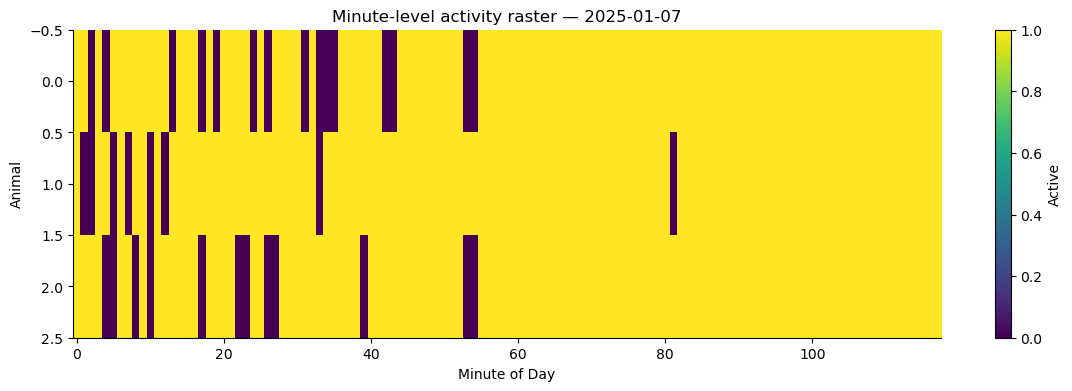

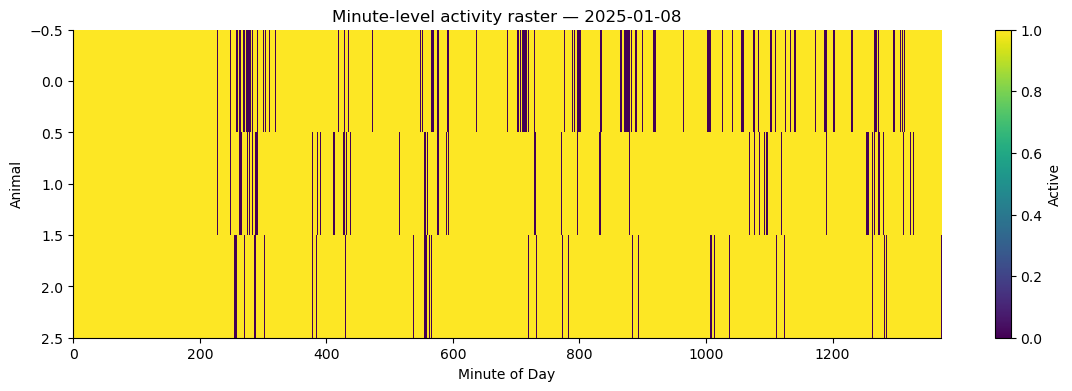

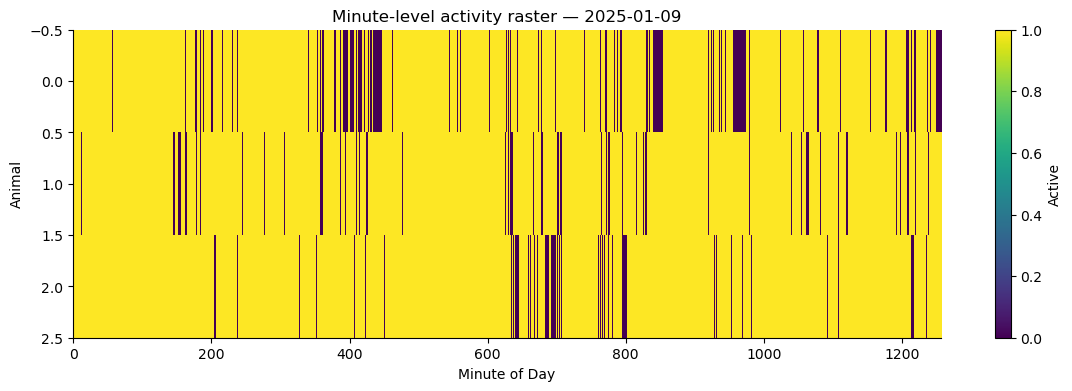

In [137]:
for day in df_raw["date"].unique():
    df_day = df_raw[df_raw["date"] == day]

    pivot = df_day.pivot_table(
        index="animal_id",
        columns="minute_of_day",
        values="is_active",
        aggfunc="max"
    )

    plt.figure(figsize=(14,4))
    plt.imshow(pivot, aspect="auto", interpolation="none")
    plt.colorbar(label="Active")
    plt.xlabel("Minute of Day")
    plt.ylabel("Animal")
    plt.title(f"Minute-level activity raster — {day}")
    plt.show()


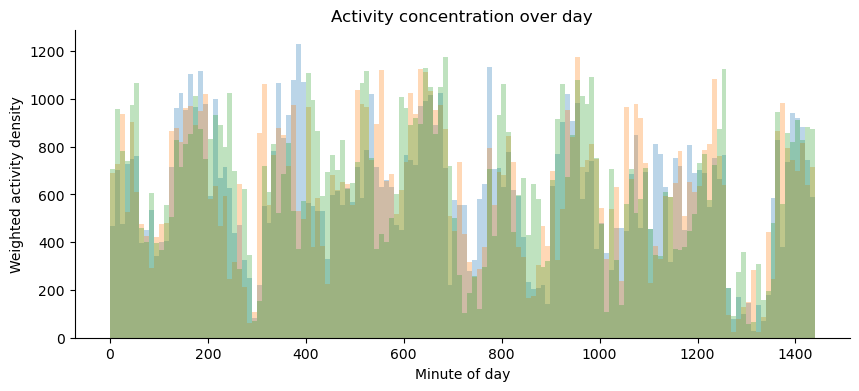

In [119]:
df_raw["minute_of_day"] = (
    df_raw["timestamp"].dt.hour * 60 + df_raw["timestamp"].dt.minute
)

plt.figure(figsize=(10,4))
for animal_id, g in df_raw.groupby("animal_id"):
    plt.hist(
        g["minute_of_day"],
        weights=g["active_seconds"],
        bins=144,
        alpha=0.3
    )

plt.xlabel("Minute of day")
plt.ylabel("Weighted activity density")
plt.title("Activity concentration over day")
plt.show()


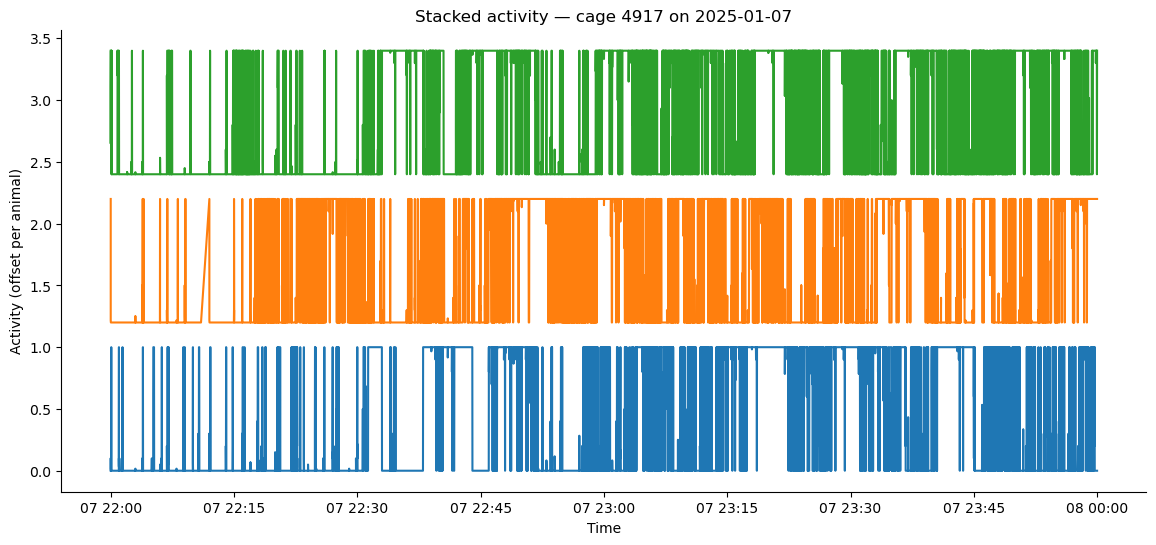

In [105]:
day_to_plot = pd.Timestamp("2025-01-07")
plt.figure(figsize=(14,6))
offset = 0
for animal_id, g in df_raw[df_raw["timestamp"].dt.floor('D') == day_to_plot].groupby("animal_id"):
    plt.plot(g["timestamp"], g["active_seconds"] + offset)
    offset += g["active_seconds"].max() * 1.2
plt.title(f"Stacked activity — cage {CAGE_ID} on {day_to_plot.date()}")
plt.xlabel("Time")
plt.ylabel("Activity (offset per animal)")
plt.show()


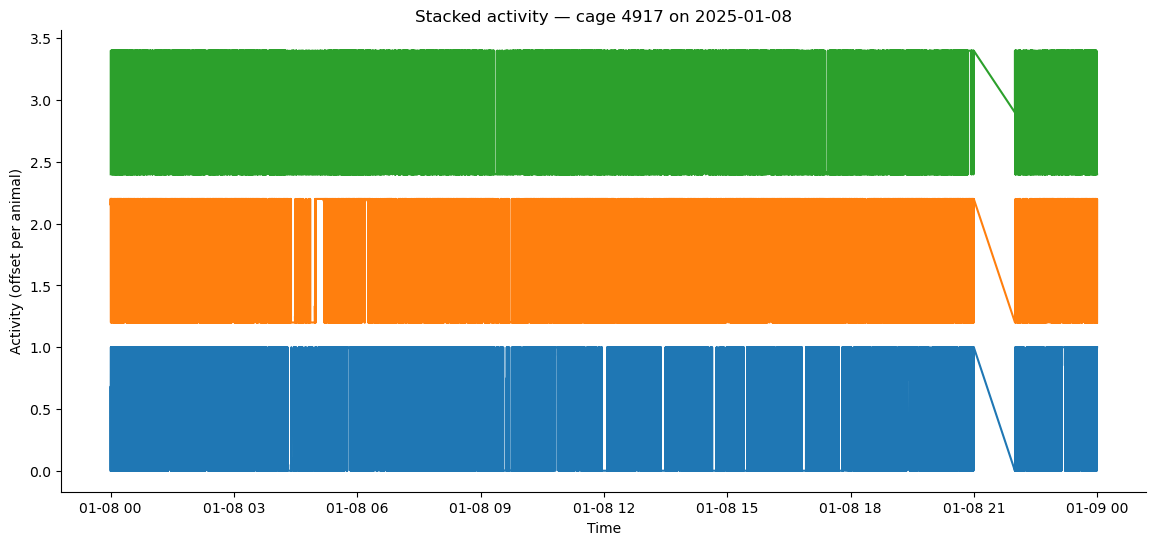

In [107]:
day_to_plot = pd.Timestamp("2025-01-08")
plt.figure(figsize=(14,6))
offset = 0
for animal_id, g in df_raw[df_raw["timestamp"].dt.floor('D') == day_to_plot].groupby("animal_id"):
    plt.plot(g["timestamp"], g["active_seconds"] + offset)
    offset += g["active_seconds"].max() * 1.2
plt.title(f"Stacked activity — cage {CAGE_ID} on {day_to_plot.date()}")
plt.xlabel("Time")
plt.ylabel("Activity (offset per animal)")
plt.show()


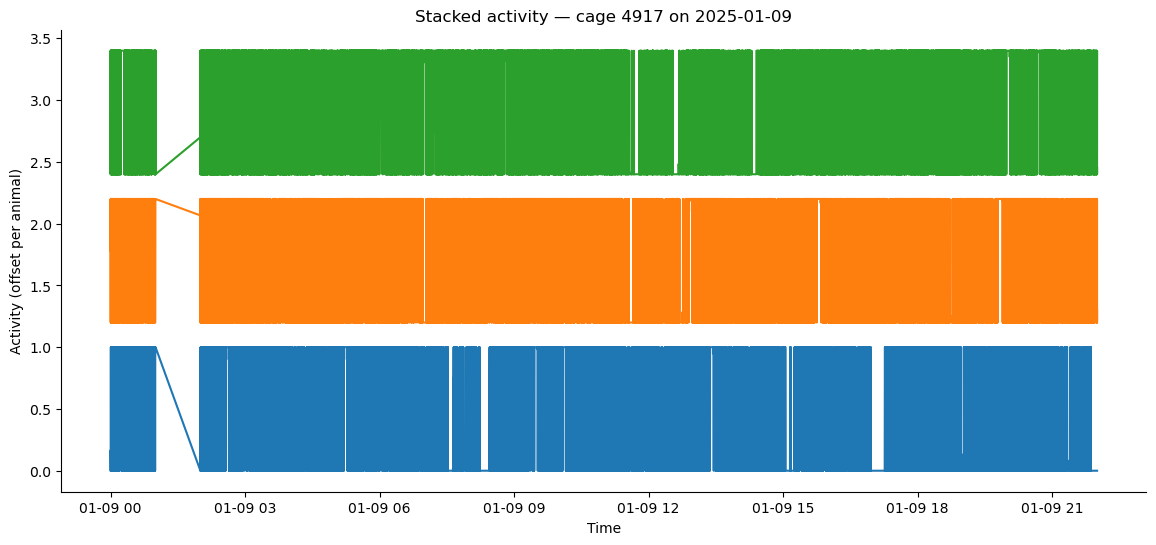

In [109]:
day_to_plot = pd.Timestamp("2025-01-09")
plt.figure(figsize=(14,6))
offset = 0
for animal_id, g in df_raw[df_raw["timestamp"].dt.floor('D') == day_to_plot].groupby("animal_id"):
    plt.plot(g["timestamp"], g["active_seconds"] + offset)
    offset += g["active_seconds"].max() * 1.2
plt.title(f"Stacked activity — cage {CAGE_ID} on {day_to_plot.date()}")
plt.xlabel("Time")
plt.ylabel("Activity (offset per animal)")
plt.show()


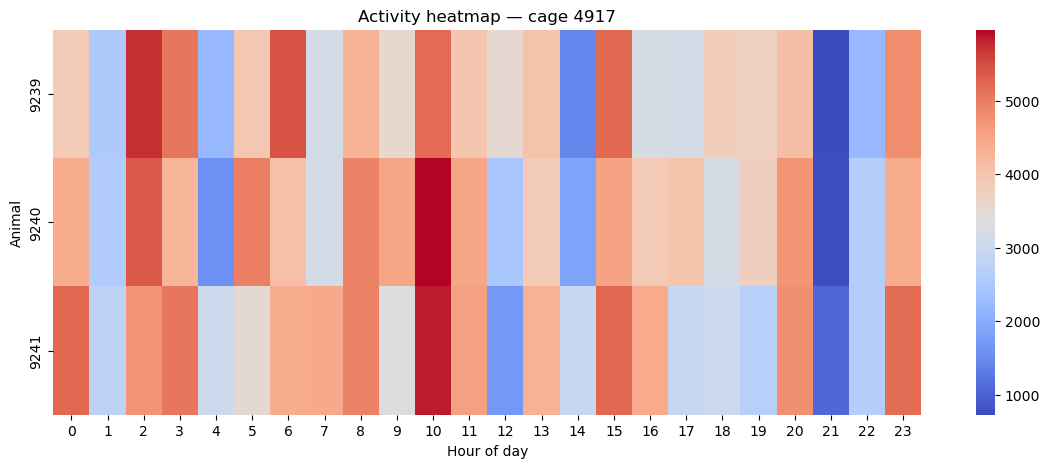

In [111]:
df_raw['hour'] = df_raw['timestamp'].dt.hour
heatmap_df = df_raw.groupby(['animal_id', 'hour'])['active_seconds'].sum().unstack()
sns.heatmap(heatmap_df, cmap='coolwarm')
plt.title(f"Activity heatmap — cage {CAGE_ID}")
plt.xlabel("Hour of day")
plt.ylabel("Animal")
plt.show()


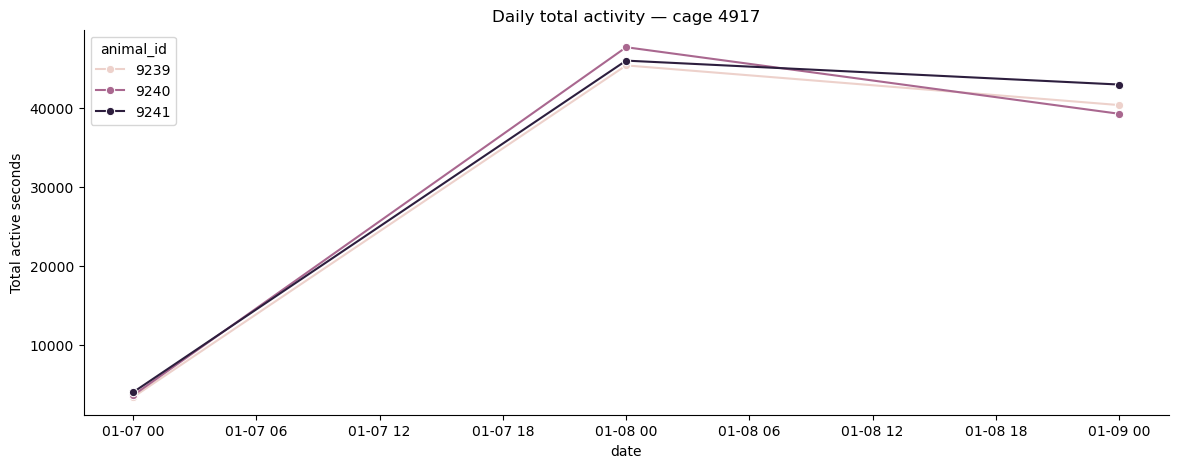

In [113]:
df_daily = df_raw.groupby(['animal_id', df_raw['timestamp'].dt.floor('D')])['active_seconds'].sum().reset_index()
df_daily.columns = ['animal_id', 'date', 'daily_activity']

sns.lineplot(data=df_daily, x='date', y='daily_activity', hue='animal_id', marker='o')
plt.title(f"Daily total activity — cage {CAGE_ID}")
plt.ylabel("Total active seconds")
plt.show()


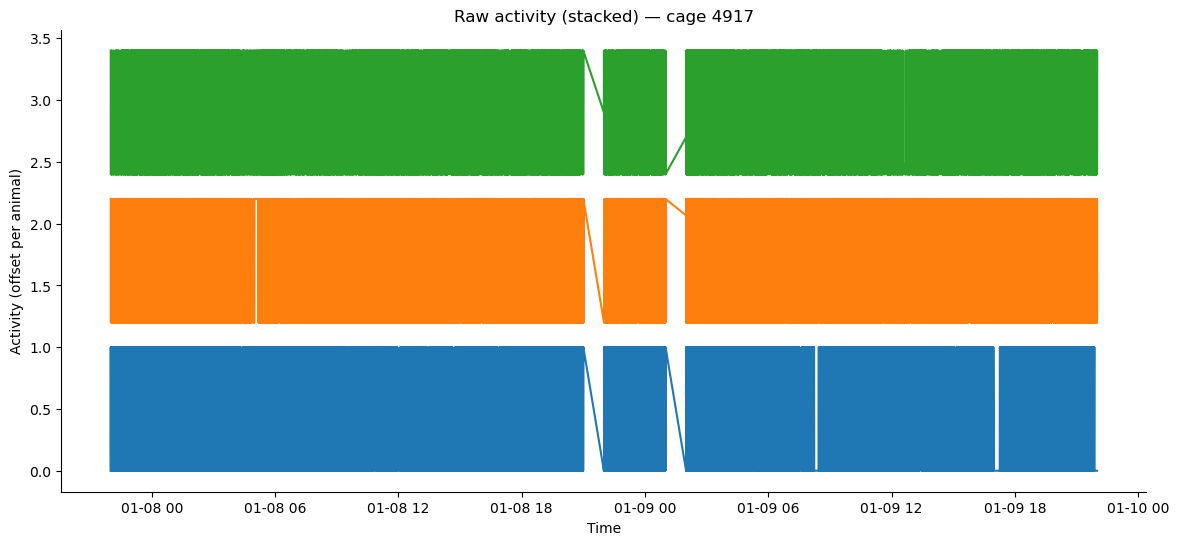

In [69]:
plt.figure(figsize=(14,6))

offset = 0
for animal_id, g in df_raw.groupby("animal_id"):
    plt.plot(g["timestamp"], g["active_seconds"] + offset)
    offset += g["active_seconds"].max() * 1.2

plt.title(f"Raw activity (stacked) — cage {CAGE_ID}")
plt.xlabel("Time")
plt.ylabel("Activity (offset per animal)")
plt.show()


In [73]:
df_daily = con.execute(f"""
SELECT
  DATE(time) AS date,
  animal_id,
  SUM(value) AS daily_activity
FROM animal_activity
WHERE cage_id = {CAGE_ID}
  AND name = 'animal_bouts.active'
GROUP BY DATE(time), animal_id
ORDER BY DATE(time)
""").df()

df_daily.head()


,date,animal_id,daily_activity
0,2025-01-07,9240,3561.050000
1,2025-01-07,9239,3336.600000
2,2025-01-07,9241,3953.000000
3,2025-01-08,9241,45949.716667
4,2025-01-08,9240,47645.933333


In [75]:
df_daily["z_activity"] = (
    df_daily
    .groupby("animal_id")["daily_activity"]
    .transform(lambda x: (x - x.mean()) / x.std())
)


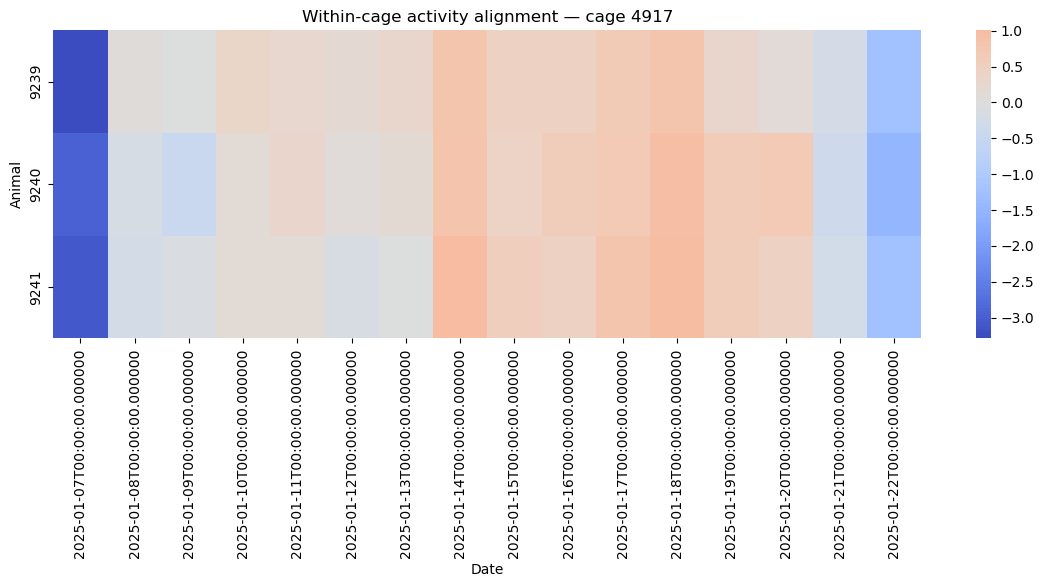

In [77]:
heatmap_df = df_daily.pivot(
    index="animal_id",
    columns="date",
    values="z_activity"
)

plt.figure(figsize=(14,4))
sns.heatmap(heatmap_df, cmap="coolwarm", center=0)
plt.title(f"Within-cage activity alignment — cage {CAGE_ID}")
plt.xlabel("Date")
plt.ylabel("Animal")
plt.show()
